# Logistic Regression

## Data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

PATH = '/content/gdrive/MyDrive/Creditcard_data/creditcard.csv';

Mounted at /content/gdrive


## Credit card data

In [ ]:
import pandas as pd

creditcard_df = pd.read_csv(PATH)
creditcard_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
creditcard_df.shape

(284807, 31)

## Class-imbalance - fraud transactions

In [ ]:
creditcard_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Test Training Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = creditcard_df.drop(['Class'],axis=1)
y = creditcard_df.Class

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.33)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))  # rows

train rows: 190820, test rows: 93987


## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

lr.score(X_test, y_test)

0.9991488184536159

## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, labels=[1,0])

array([[   98,    64],
       [   16, 93809]])

In [ ]:
from sklearn.metrics import accuracy_score


tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.91%
sensitivity = 60.49%
specificity = 99.98%



# Define Functions for further research

In [ ]:
from dataclasses import dataclass

@dataclass
class StatistictsData:
    name: str
    accuracy: float
    sensitivity: float
    specificity: float

def calculate_statistics(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) * 100
    sensitivity = tp / (tp + fn) * 100
    accuracy = accuracy_score(y_test, y_pred) * 100

    return accuracy, sensitivity, specificity

In [ ]:
def run_logisticregression(X_train, X_test, y_train, **estimator_params):
    lr = LogisticRegression(random_state=0, **estimator_params)
    y_pred = lr.fit(X_train,y_train).fit(X_train, y_train).predict(X_test)
    return y_pred

In [ ]:
def logisticregression_evaluation(current_range, lr_statistics_list, **lr_params):
    y_pred = run_logisticregression(X_train, X_test, y_train, **lr_params)
    stats = calculate_statistics(y_test, y_pred)
    lr_stats = StatistictsData(current_range, *stats)
    lr_statistics_list.append(lr_stats)

# Changing parameters of logistic regression

In [ ]:
statistics_C = [] # 0.5 1 1.5 2 2.5 3 3.5 4 4.5 5 5.5
statistics_max_iter = [] # 200 400 600 800 1000 1200 1400 1600 1800 2000 2200

In [ ]:
import numpy as np

common_range = np.arange(0.5, 6, 0.5)

for size in common_range:
    # statistics C
    logisticregression_evaluation(size, statistics_C, C=size)
    # statistics max iterations
    logisticregression_evaluation(size, statistics_max_iter, max_iter=size*400)

In [ ]:
statistics_C_df = pd.DataFrame(statistics_C)
statistics_C_df.rename(columns={'name':'C'}, inplace=True)
statistics_max_iter_df = pd.DataFrame(statistics_max_iter)
statistics_max_iter_df.rename(columns={'name':'max iter'}, inplace=True)
statistics_max_iter_df["max iter"] *= 400
grouped_stats_dfs = [statistics_C_df, statistics_max_iter_df]

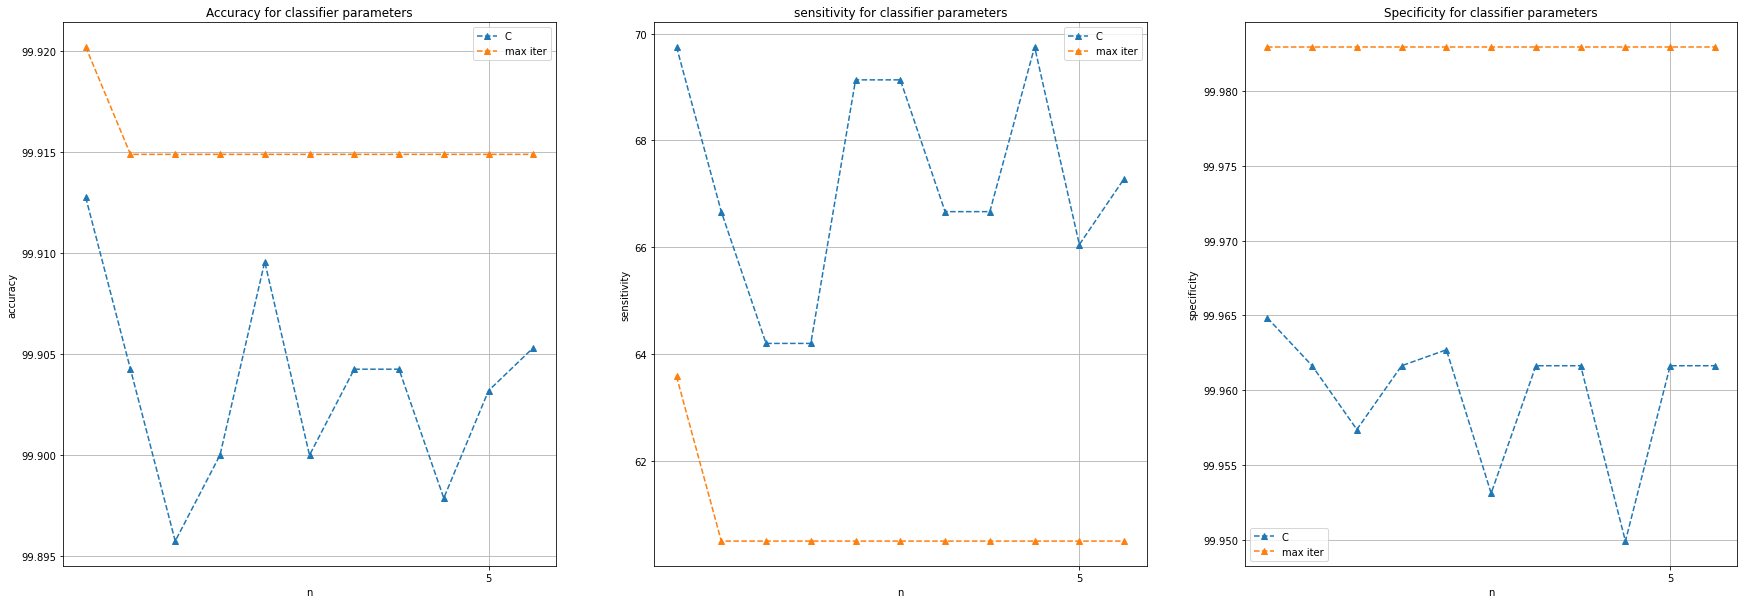

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

plot_style = {"marker": '^', "linestyle": '--'}
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

def plot_grouped_stats(ax, stats, stat_name):
    ax.plot(common_range, stats[0][stat_name], label="C", **plot_style)
    ax.plot(common_range, stats[1][stat_name], label="max iter", **plot_style)
    ax.grid(b=True)
    ax.legend()

for i,stat_name in enumerate(["accuracy", "sensitivity", "specificity"]):
    plot_grouped_stats(axs[i], grouped_stats_dfs, stat_name)

axs[0].set(xlabel='n', ylabel='accuracy',
        title='Accuracy for classifier parameters')
axs[1].set(xlabel='n', ylabel='sensitivity',
        title='sensitivity for classifier parameters')
axs[2].set(xlabel='n', ylabel='specificity',
        title='Specificity for classifier parameters')


loc = plticker.MultipleLocator(base=5.0)
for ax in axs:
    ax.xaxis.set_major_locator(loc)

plt.show()

## Conclusion

Accuracy and specificity are on level 99%. Sensitivity is the best for C 0.5 and 5. Max iterations don't influence sensitivity. Sensitivity is too small for further researches.